![Logo Universidad Galileo](assets/Logo_Universidad_Galileo.png)

# Environment setup

In [17]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score, classification_report

In [19]:
from constants import Constants
import utils as utils

# Loading data

In [20]:
dataframePart1 = pd.read_parquet(Constants.info_part1_path)
dataframePart2 = pd.read_parquet(Constants.info_part2_path)

## Inspecting if there is a difference in files

In [21]:
dataframePart1

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121888,110,5.222484,574.473204,Basic,Bank transfer,No,Both,Yes,Tablet,20.805085,...,1,Low,Increased,0.428816,Basic-Bank transfer,2288.559393,-1260.979422,-4532.372414,21.656638,0
121889,25,16.654703,416.367566,Standard,Credit card,No,Both,No,Tablet,12.620406,...,2,Low,Decreased,0.438821,Standard-Credit card,315.510144,416.932518,2112.889117,23.010134,0
121890,25,15.708324,392.708090,Basic,Credit card,Yes,TV Shows,No,Mobile,10.575187,...,3,Low,No Change,-0.129349,Basic-Credit card,264.379675,520.236064,-13900.273813,11.373751,1
121891,1,13.035456,13.035456,Basic,Bank transfer,Yes,Movies,No,TV,9.391702,...,4,Low,Increased,-0.116135,Basic-Bank transfer,9.391702,400.547408,11323.727109,65.018624,0


In [22]:
dataframePart2

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,119,6.061857,721.361030,Basic,Credit card,Yes,Movies,No,Tablet,19.818269,...,1,Low,No Change,-0.402658,Basic-Credit card,2358.373997,-477.443486,1237.881755,15.791455,0
1,57,16.297635,928.965223,Standard,Mailed check,No,TV Shows,Yes,Computer,14.439444,...,3,Medium,Increased,-1.848103,Standard-Mailed check,823.048334,253.543900,-7326.243606,47.821783,1
2,48,19.817212,951.226178,Standard,Mailed check,Yes,Movies,Yes,Tablet,13.270830,...,3,Medium,Increased,-0.330016,Standard-Mailed check,636.999839,-131.818739,-12931.413534,56.989866,0
3,82,19.441192,1594.177777,Basic,Electronic check,Yes,Movies,No,Mobile,36.915908,...,1,High,Increased,1.862545,Basic-Electronic check,3027.104454,798.269693,-17958.856397,21.751379,0
4,71,17.199560,1221.168792,Basic,Credit card,Yes,TV Shows,No,TV,21.316214,...,1,Medium,Increased,0.649223,Basic-Credit card,1513.451180,-1168.072346,-5990.916558,28.793683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491,0
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183,0
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613,0
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867,0


## Merging dataframes

In [23]:
allDataDataFrame = pd.concat([dataframePart1, dataframePart2], axis=0)
allDataDataFrame

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491,0
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183,0
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613,0
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867,0


## Detecting nulls

In [24]:
missing_values = allDataDataFrame.isnull().sum().sort_values()
print("Missing Values: ", missing_values)

Missing Values:  AccountAge                        0
AnnualIncome                      0
Location                          0
EducationLevel                    0
SocialMediaInteractions           0
PersonalizedRecommendations       0
CommentsOnContent                 0
WebsiteVisitsPerWeek              0
Age                               0
OffersDiscounts                   0
TotalChargesCategory              0
MonthlyChargesChange              0
ViewingHoursVariation             0
SubscriptionPaymentInteraction    0
AccountViewingInteraction         0
NetworkLatency                    0
BandwidthUsage                    0
NumProfiles                       0
EngagementScore                   0
CustomerID                        0
ParentalControl                   0
MonthlyCharges                    0
TotalCharges                      0
SubscriptionType                  0
PaymentMethod                     0
PaperlessBilling                  0
ContentType                       0
MultiDevice

## Removing Churn and CustomerID from dataset to work with

In [43]:
allDataDataFrameCopy = allDataDataFrame.copy().drop(columns=['CustomerID'])

allDataDataFrameCopy

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,NumProfiles,TotalChargesCategory,MonthlyChargesChange,ViewingHoursVariation,SubscriptionPaymentInteraction,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,3,Low,Decreased,0.853802,Premium-Mailed check,735.162078,1521.525778,-6269.511593,25.503069,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,2,Low,Decreased,0.868619,Basic-Credit card,1849.682366,887.208761,4237.539156,10.250613,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,3,Medium,No Change,-0.057224,Basic-Mailed check,539.846688,1417.106269,23081.200144,23.001931,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,3,Low,Decreased,0.880848,Basic-Electronic check,894.732438,499.133801,4612.778084,52.614266,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,4,Medium,Increased,-1.115051,Premium-Electronic check,1144.753650,1310.290739,2116.163308,18.146301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121889,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,2,Low,Increased,-1.233777,Basic-Mailed check,1039.710147,-302.272067,-14484.098717,31.876491,0
121890,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,2,Medium,Decreased,0.846692,Premium-Credit card,2920.704989,2685.627533,-8594.860064,23.984183,0
121891,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,3,High,Decreased,-0.909294,Premium-Credit card,1201.046316,508.449869,-9618.256354,70.290613,0
121892,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,1,Low,Increased,-1.112677,Premium-Bank transfer,213.267477,-857.379848,24324.742519,61.386867,0


In [44]:
allDataDataFrameCopy.select_dtypes(include=['object']).columns

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled', 'Location', 'EducationLevel',
       'MonthlyChargesChange', 'SubscriptionPaymentInteraction'],
      dtype='object')

## Mini script for converting col names into python variables

In [45]:
dec = ''
for col in allDataDataFrame.columns:
    initial: str = col[0].lower()
    dec += f'{initial}{col[1:]}Col = \'{col}\' \n'

print(dec)

accountAgeCol = 'AccountAge' 
monthlyChargesCol = 'MonthlyCharges' 
totalChargesCol = 'TotalCharges' 
subscriptionTypeCol = 'SubscriptionType' 
paymentMethodCol = 'PaymentMethod' 
paperlessBillingCol = 'PaperlessBilling' 
contentTypeCol = 'ContentType' 
multiDeviceAccessCol = 'MultiDeviceAccess' 
deviceRegisteredCol = 'DeviceRegistered' 
viewingHoursPerWeekCol = 'ViewingHoursPerWeek' 
averageViewingDurationCol = 'AverageViewingDuration' 
contentDownloadsPerMonthCol = 'ContentDownloadsPerMonth' 
genrePreferenceCol = 'GenrePreference' 
userRatingCol = 'UserRating' 
supportTicketsPerMonthCol = 'SupportTicketsPerMonth' 
genderCol = 'Gender' 
watchlistSizeCol = 'WatchlistSize' 
parentalControlCol = 'ParentalControl' 
subtitlesEnabledCol = 'SubtitlesEnabled' 
customerIDCol = 'CustomerID' 
ageCol = 'Age' 
annualIncomeCol = 'AnnualIncome' 
locationCol = 'Location' 
educationLevelCol = 'EducationLevel' 
socialMediaInteractionsCol = 'SocialMediaInteractions' 
personalizedRecommendationsCol = 'Pe

In [46]:
accountAgeCol = 'AccountAge' 
monthlyChargesCol = 'MonthlyCharges' 
totalChargesCol = 'TotalCharges' 
subscriptionTypeCol = 'SubscriptionType' 
paymentMethodCol = 'PaymentMethod' 
paperlessBillingCol = 'PaperlessBilling' 
contentTypeCol = 'ContentType' 
multiDeviceAccessCol = 'MultiDeviceAccess' 
deviceRegisteredCol = 'DeviceRegistered' 
viewingHoursPerWeekCol = 'ViewingHoursPerWeek' 
averageViewingDurationCol = 'AverageViewingDuration' 
contentDownloadsPerMonthCol = 'ContentDownloadsPerMonth' 
genrePreferenceCol = 'GenrePreference' 
userRatingCol = 'UserRating' 
supportTicketsPerMonthCol = 'SupportTicketsPerMonth' 
genderCol = 'Gender' 
watchlistSizeCol = 'WatchlistSize' 
parentalControlCol = 'ParentalControl' 
subtitlesEnabledCol = 'SubtitlesEnabled' 
customerIDCol = 'CustomerID' 
ageCol = 'Age' 
annualIncomeCol = 'AnnualIncome' 
locationCol = 'Location' 
educationLevelCol = 'EducationLevel' 
socialMediaInteractionsCol = 'SocialMediaInteractions' 
personalizedRecommendationsCol = 'PersonalizedRecommendations' 
commentsOnContentCol = 'CommentsOnContent' 
websiteVisitsPerWeekCol = 'WebsiteVisitsPerWeek' 
offersDiscountsCol = 'OffersDiscounts' 
numProfilesCol = 'NumProfiles' 
totalChargesCategoryCol = 'TotalChargesCategory' 
monthlyChargesChangeCol = 'MonthlyChargesChange' 
viewingHoursVariationCol = 'ViewingHoursVariation' 
subscriptionPaymentInteractionCol = 'SubscriptionPaymentInteraction' 
accountViewingInteractionCol = 'AccountViewingInteraction' 
networkLatencyCol = 'NetworkLatency' 
bandwidthUsageCol = 'BandwidthUsage' 
engagementScoreCol = 'EngagementScore' 
churnCol = 'Churn' 


In [47]:
for col in allDataDataFrameCopy.select_dtypes(include=['object']).columns:
    print(f"col: {col}: values: f{allDataDataFrameCopy[col].unique()}")

col: SubscriptionType: values: f['Premium' 'Basic' 'Standard']
col: PaymentMethod: values: f['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
col: PaperlessBilling: values: f['No' 'Yes']
col: ContentType: values: f['Both' 'Movies' 'TV Shows']
col: MultiDeviceAccess: values: f['No' 'Yes']
col: DeviceRegistered: values: f['Mobile' 'Tablet' 'Computer' 'TV']
col: GenrePreference: values: f['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
col: Gender: values: f['Male' 'Female']
col: ParentalControl: values: f['No' 'Yes']
col: SubtitlesEnabled: values: f['No' 'Yes']
col: Location: values: f['Urban' 'Suburban' 'Rural']
col: EducationLevel: values: f['High School' 'Bachelor' 'PhD' 'Master']
col: MonthlyChargesChange: values: f['Decreased' 'No Change' 'Increased']
col: SubscriptionPaymentInteraction: values: f['Premium-Mailed check' 'Basic-Credit card' 'Basic-Mailed check'
 'Basic-Electronic check' 'Premium-Electronic check'
 'Premium-Bank transfer' 'Standard-Electronic check'
 'St

## Plotting distribution of numerical variables

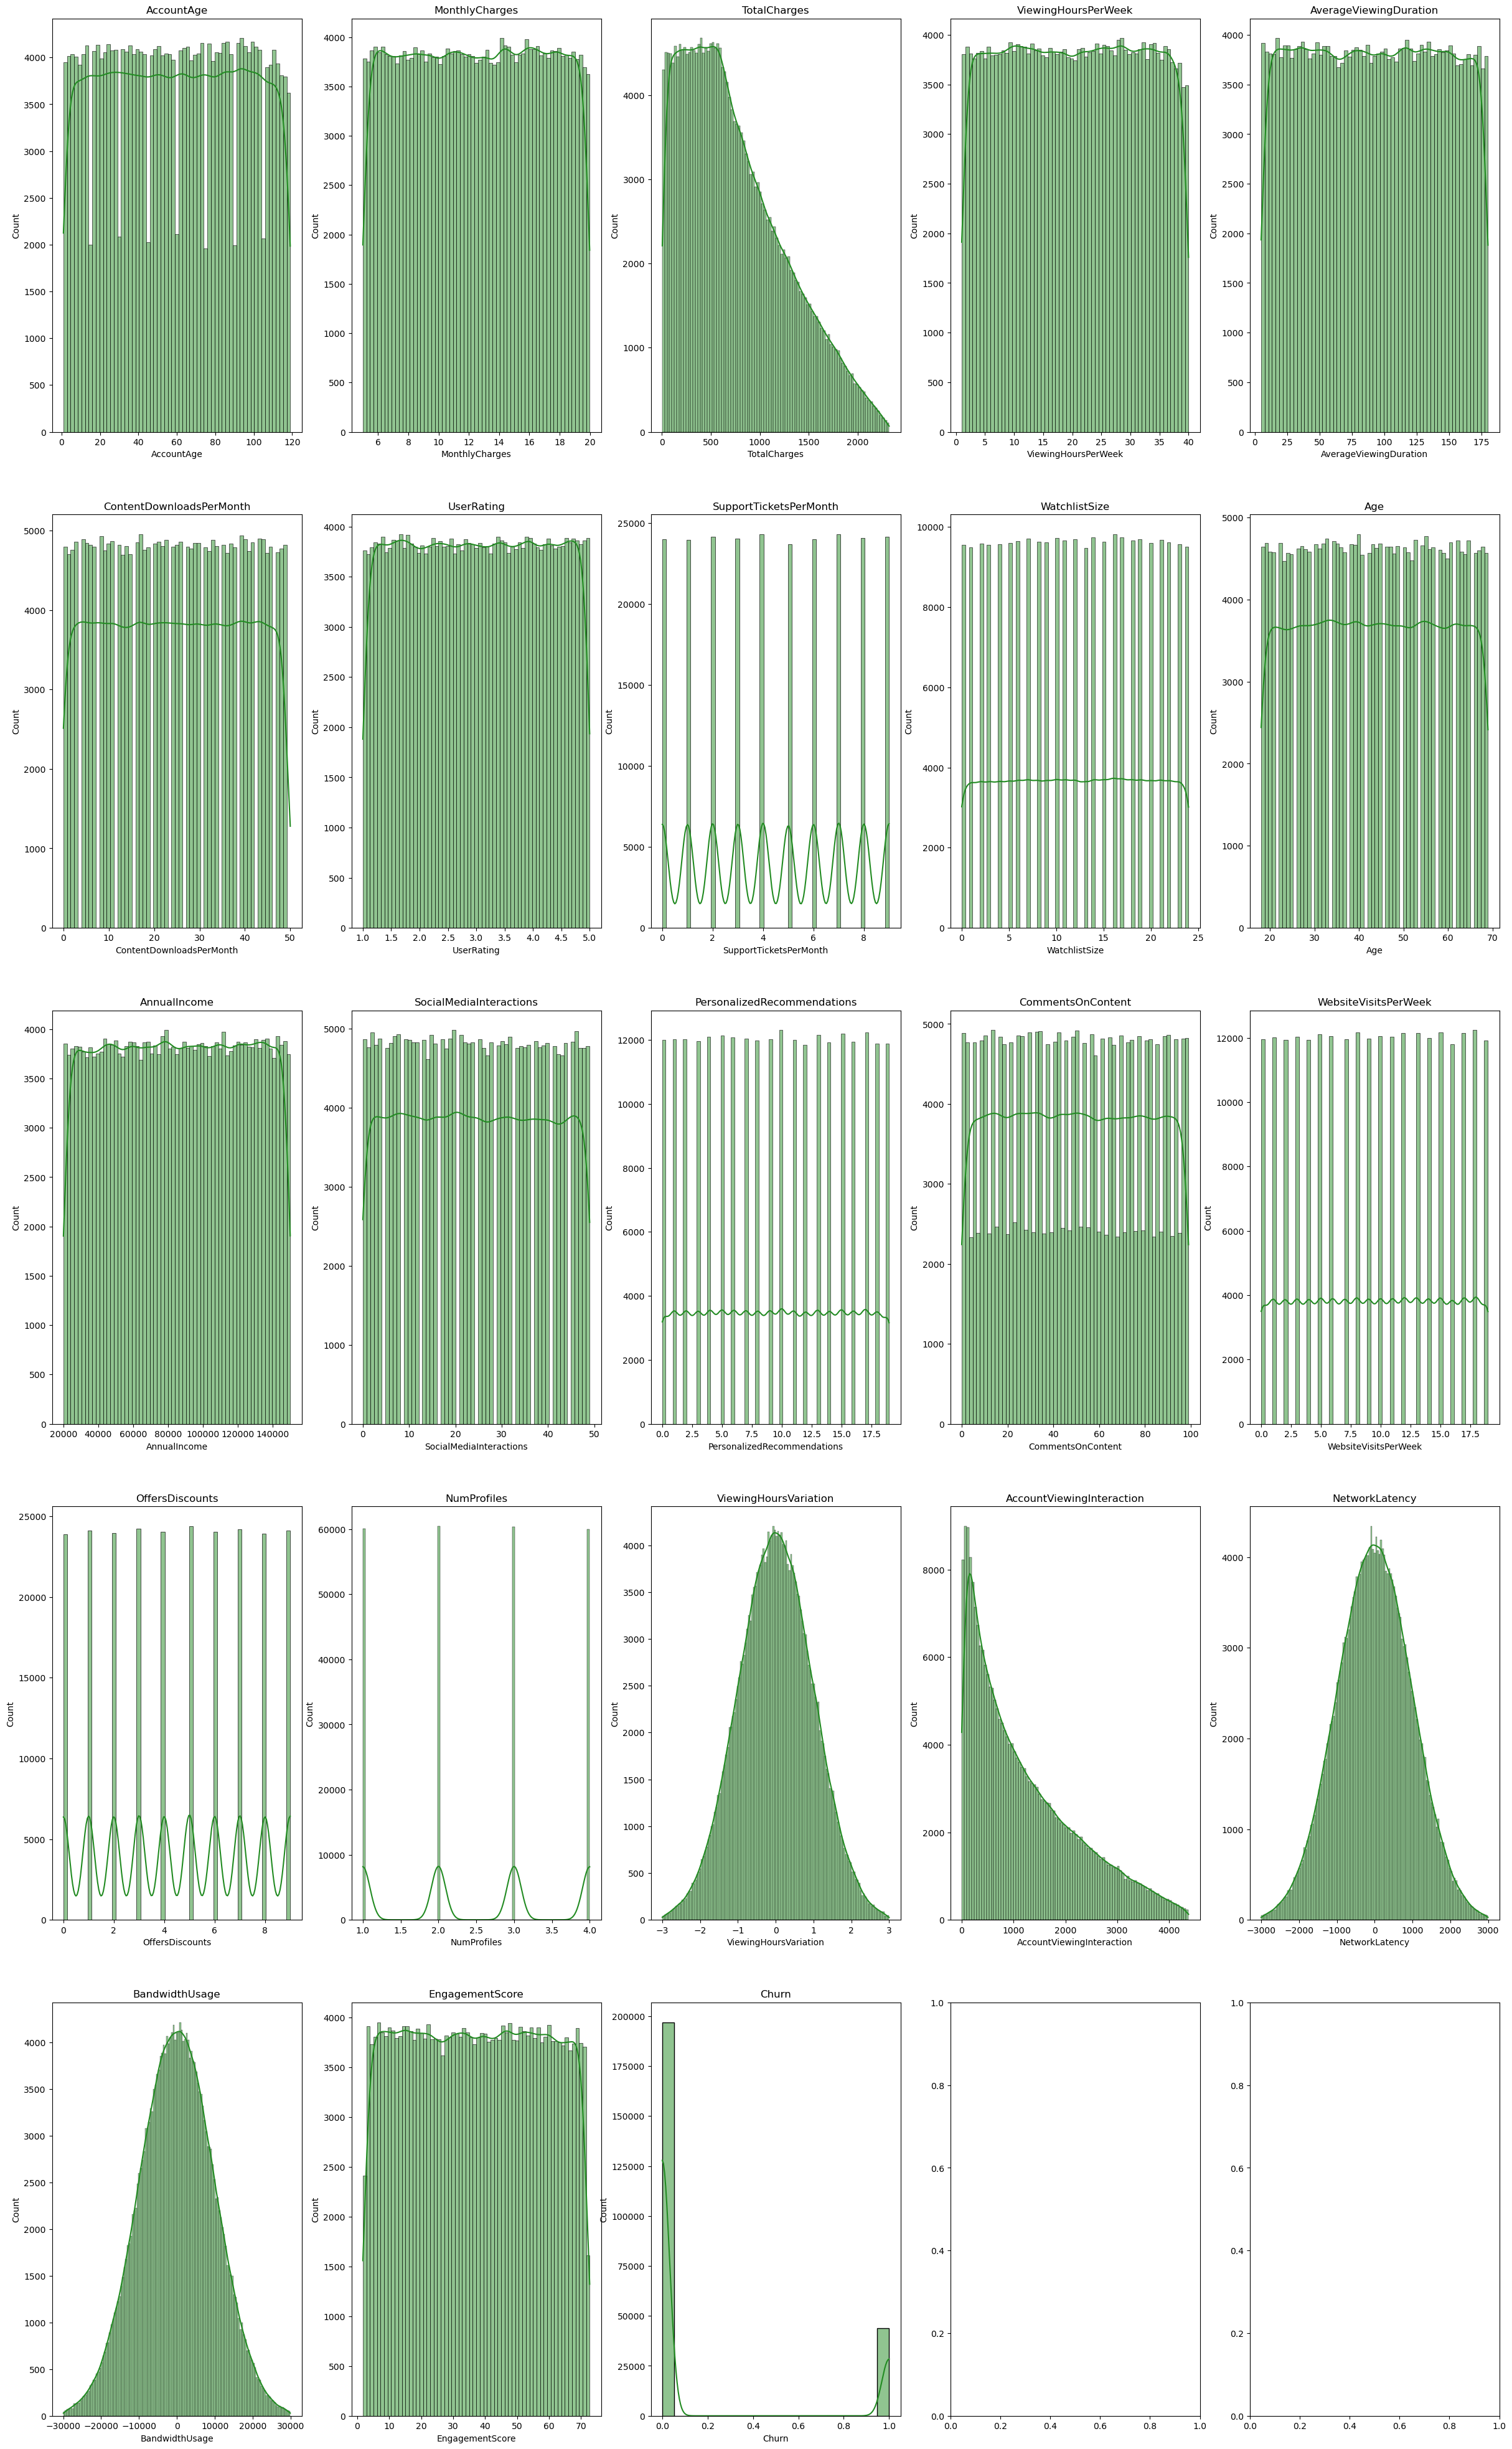

In [ ]:
plotDf = allDataDataFrameCopy.select_dtypes(Constants.numerics)
print(plotDf)

fig, axes = plt.subplots(nrows=5, ncols=5)
axes = axes.flatten()
fig.set_size_inches(30, 50)

for ax, col in zip(axes, plotDf.columns):
    sns.histplot(plotDf[col], ax = ax, color='forestgreen', kde=True)
    ax.set_title(col)



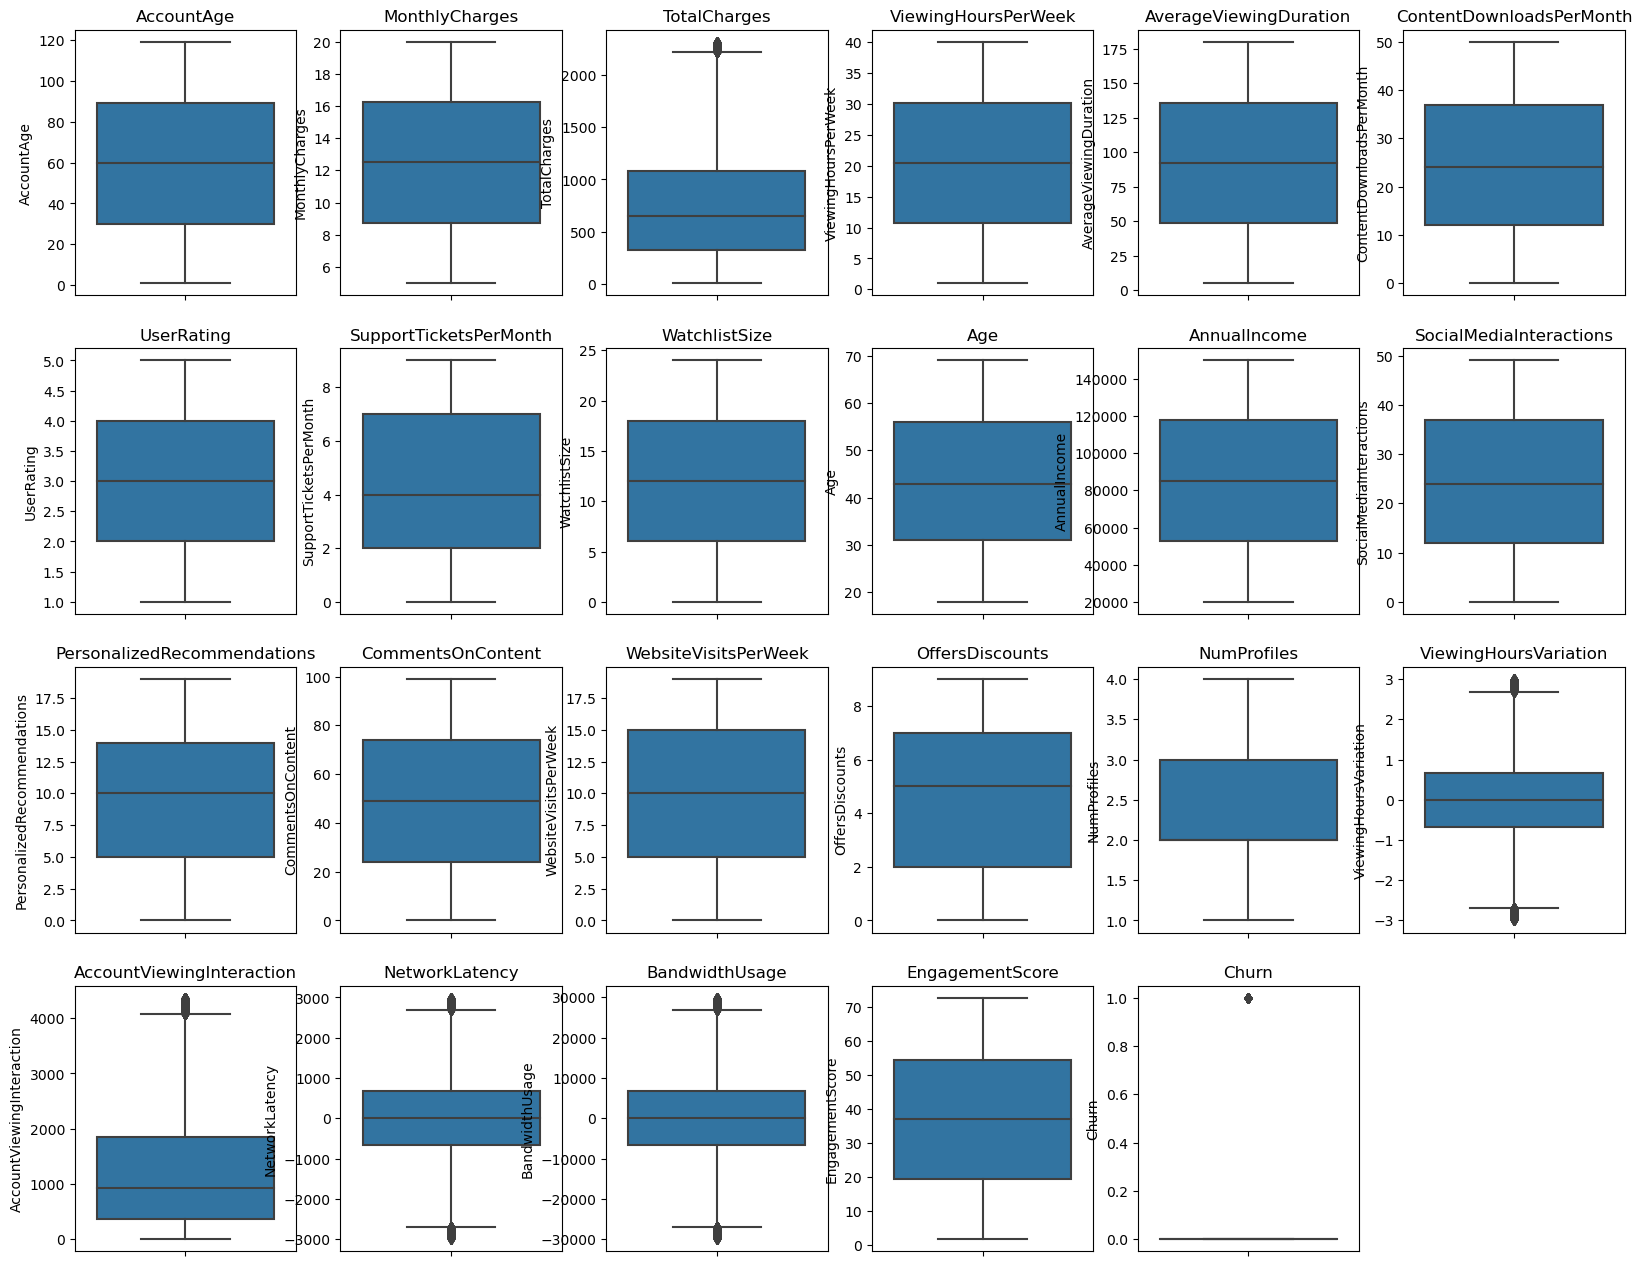

In [63]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(plotDf, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(data=plotDf, y=column)
    plt.title(column)

plt.show()



We can notice that some columns have outliers

## Feature engineering

In [64]:
plotDf.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Age,...,CommentsOnContent,WebsiteVisitsPerWeek,OffersDiscounts,NumProfiles,ViewingHoursVariation,AccountViewingInteraction,NetworkLatency,BandwidthUsage,EngagementScore,Churn
count,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,...,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.000000,240757.00000
mean,59.825467,12.486891,747.082878,20.435793,92.240467,24.500953,3.002646,4.504646,12.015813,43.493776,...,49.441312,9.512081,4.503063,2.499184,-0.000349,1218.070627,-1.385909,-24.026632,37.005352,0.18186
std,34.162821,4.324922,520.215826,11.209739,50.506321,14.421076,1.155433,2.873064,7.194348,14.989023,...,28.849687,5.761472,2.868713,1.116502,0.987841,1028.994624,985.054969,9843.529128,20.170156,0.38573
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,1.000000,-3.002268,1.000756,-2997.735934,-29939.815756,1.745281,0.00000
25%,30.000000,8.737625,327.545591,10.727361,48.353050,12.000000,2.000578,2.000000,6.000000,31.000000,...,24.000000,5.000000,2.000000,2.000000,-0.671722,364.906027,-674.027631,-6733.433611,19.479843,0.00000
50%,60.000000,12.491171,646.757429,20.457110,92.236597,24.000000,3.002207,4.000000,12.000000,43.000000,...,49.000000,10.000000,5.000000,2.000000,0.000037,933.266606,-0.427334,2.299700,36.996899,0.00000
75%,89.000000,16.232024,1083.923171,30.121762,135.869980,37.000000,4.002370,7.000000,18.000000,56.000000,...,74.000000,15.000000,7.000000,3.000000,0.671397,1849.425034,671.348643,6681.061425,54.416665,0.00000
max,119.000000,19.989957,2319.725108,39.999723,179.999275,50.000000,4.999989,9.000000,24.000000,69.000000,...,99.000000,19.000000,9.000000,4.000000,3.001944,4371.500236,2994.058220,29894.425576,72.703555,1.00000


## Z-score

Detecting how many outliers are in each column

In [65]:
utils.print_outliers(plotDf)

Percentage that outliers represent
AccountAge                     0.000000
MonthlyCharges                 0.000000
TotalCharges                   0.022429
ViewingHoursPerWeek            0.000000
AverageViewingDuration         0.000000
ContentDownloadsPerMonth       0.000000
UserRating                     0.000000
SupportTicketsPerMonth         0.000000
WatchlistSize                  0.000000
Age                            0.000000
AnnualIncome                   0.000000
SocialMediaInteractions        0.000000
PersonalizedRecommendations    0.000000
CommentsOnContent              0.000000
WebsiteVisitsPerWeek           0.000000
OffersDiscounts                0.000000
NumProfiles                    0.000000
ViewingHoursVariation          0.033644
AccountViewingInteraction      0.139975
NetworkLatency                 0.035721
BandwidthUsage                 0.036967
EngagementScore                0.000000
Churn                          0.000000
dtype: float64


We can see they don't represent even a $ 1\% $ of all the data so we could try and remove them.

In [66]:
allDataDataFrameCopy = utils.remove_outliers_zscore(allDataDataFrameCopy)

In [67]:
utils.print_outliers(allDataDataFrameCopy)

Percentage that outliers represent
AccountAge                     0.000000
MonthlyCharges                 0.000000
TotalCharges                   0.007080
ViewingHoursPerWeek            0.000000
AverageViewingDuration         0.000000
ContentDownloadsPerMonth       0.000000
UserRating                     0.000000
SupportTicketsPerMonth         0.000000
WatchlistSize                  0.000000
Age                            0.000000
AnnualIncome                   0.000000
SocialMediaInteractions        0.000000
PersonalizedRecommendations    0.000000
CommentsOnContent              0.000000
WebsiteVisitsPerWeek           0.000000
OffersDiscounts                0.000000
NumProfiles                    0.000000
ViewingHoursVariation          0.004998
AccountViewingInteraction      0.051226
NetworkLatency                 0.005414
BandwidthUsage                 0.001666
EngagementScore                0.000000
Churn                          0.000000
dtype: float64


### Applying one hot encoding

#### Selecting columns for one hot encoding

In [68]:
oneHotColumns = [subscriptionPaymentInteractionCol, paymentMethodCol, genrePreferenceCol, deviceRegisteredCol, locationCol]


### Inspecting some variables for encoding

In [85]:
print(allDataDataFrameCopy[subscriptionTypeCol].unique())
print(allDataDataFrameCopy[deviceRegisteredCol].unique())
print(allDataDataFrameCopy[contentTypeCol].unique())
print(allDataDataFrameCopy[monthlyChargesChangeCol].unique())
print(allDataDataFrameCopy[totalChargesCategoryCol].unique())

['Premium' 'Basic' 'Standard']
['Mobile' 'Tablet' 'Computer' 'TV']
['Both' 'Movies' 'TV Shows']
['Decreased' 'No Change' 'Increased']
['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


### Creating custom encoders for pipeline

In [70]:
oneHotColumns = [subscriptionPaymentInteractionCol, paymentMethodCol, genrePreferenceCol, deviceRegisteredCol, locationCol]
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X: pd.DataFrame):
        encoder = OneHotEncoder()
        # suscriptions
        suscriptionNames = X[subscriptionPaymentInteractionCol].unique()
        matrixSubscription = encoder.fit_transform(X[[subscriptionPaymentInteractionCol]]).toarray()
        
        #payments
        paymentNames = X[paymentMethodCol].unique()
        matrixPaymentNames = encoder.fit_transform(X[[paymentMethodCol]]).toarray()

        #genre
        genrePreferenceNames = X[genrePreferenceCol].unique()
        matrixGenre = encoder.fit_transform(X[[genrePreferenceCol]]).toarray()

        #multidevice
        deviceRegisteredName = X[deviceRegisteredCol].unique()
        deviceRegisteredMatrix = encoder.fit_transform(X[[deviceRegisteredCol]]).toarray()

        #location
        locationNames = X[locationCol].unique()
        matrixLocations = encoder.fit_transform(X[[locationCol]]).toarray()

        for i in range(len(matrixSubscription.T)):
            X[suscriptionNames[i]] = matrixSubscription.T[i]

        for i in range(len(matrixPaymentNames.T)):
            X[paymentNames[i]] = matrixPaymentNames.T[i]

        for i in range(len(matrixGenre.T)):
            X[genrePreferenceNames[i]] = matrixGenre.T[i]
            
        for i in range(len(deviceRegisteredMatrix.T)):
            X[deviceRegisteredName[i]] = deviceRegisteredMatrix.T[i]
            
        for i in range(len(matrixLocations.T)):
            X[locationNames[i]] = matrixLocations.T[i]

        X = X.drop(oneHotColumns, axis=1)
        return X

In [71]:
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        yesNoDict = {'No': 0, 'Yes':1 }
        genderDict = {'Male': 0, 'Female': 1}
        X[paperlessBillingCol] = [yesNoDict[g] for g in X[paperlessBillingCol]]
        X[multiDeviceAccessCol] = [yesNoDict[g] for g in X[multiDeviceAccessCol]]
        X[parentalControlCol] = [yesNoDict[g] for g in X[parentalControlCol]]
        X[genderCol] = [genderDict[i] for i in X[genderCol]]
        X[subtitlesEnabledCol] = [yesNoDict[i] for i in X[subtitlesEnabledCol]]
        return X

In [88]:
class OrdinalFeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        subscriptionTypeEncoder = OrdinalEncoder(categories=[['Basic', 'Standard', 'Premium']])
        X[subscriptionTypeCol] = subscriptionTypeEncoder.fit_transform(X[[subscriptionTypeCol]])

        educationLevelEncoder = OrdinalEncoder(categories=[['High School', 'Bachelor', 'PhD','Master']], handle_unknown='use_encoded_value', unknown_value=-2)
        X[educationLevelCol] = educationLevelEncoder.fit_transform(X[[educationLevelCol]])

        contentTypeEncoder = OrdinalEncoder(categories=[['Movies', 'TV Shows', 'Both']])
        X[contentTypeCol] = contentTypeEncoder.fit_transform(X[[contentTypeCol]])

        monthlyChargeChangeEncoder = OrdinalEncoder(categories=[['Decreased','No Change','Increased']])
        X[monthlyChargesChangeCol] = monthlyChargeChangeEncoder.fit_transform(X[[monthlyChargesChangeCol]])
        totalChargesCategoryEncoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
        X[totalChargesCategoryCol] = totalChargesCategoryEncoder.fit_transform(X[[totalChargesCategoryCol]])
        return X

### Executing pipeline and getting final encoded dataframe

In [115]:
pipeline = Pipeline(steps=[
    ('binaryEncoder', BinaryEncoder()),
    ('oneHotEncoding', FeatureEncoder()),
    ('ordinalEncoder', OrdinalFeatureEncoder()),
])

encodedData = allDataDataFrameCopy.copy()

encodedData: pd.DataFrame = pipeline.fit_transform(encodedData)


encodedData.select_dtypes(include=['object']).columns

print(encodedData.dtypes)
print(encodedData[churnCol])


AccountAge            int64
MonthlyCharges      float64
TotalCharges        float64
SubscriptionType    float64
PaperlessBilling      int64
                     ...   
Computer            float64
TV                  float64
Urban               float64
Suburban            float64
Rural               float64
Length: 61, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
121889    0
121890    0
121891    0
121892    0
121893    0
Name: Churn, Length: 240112, dtype: int64


## Correlation matrix


In [116]:
cols_with_low = encodedData.applymap(lambda x: x == 'Low').any()
cols_with_low = cols_with_low[cols_with_low].index.tolist()

print("Columns containing 'Low':", cols_with_low)


Columns containing 'Low': []


<Axes: >

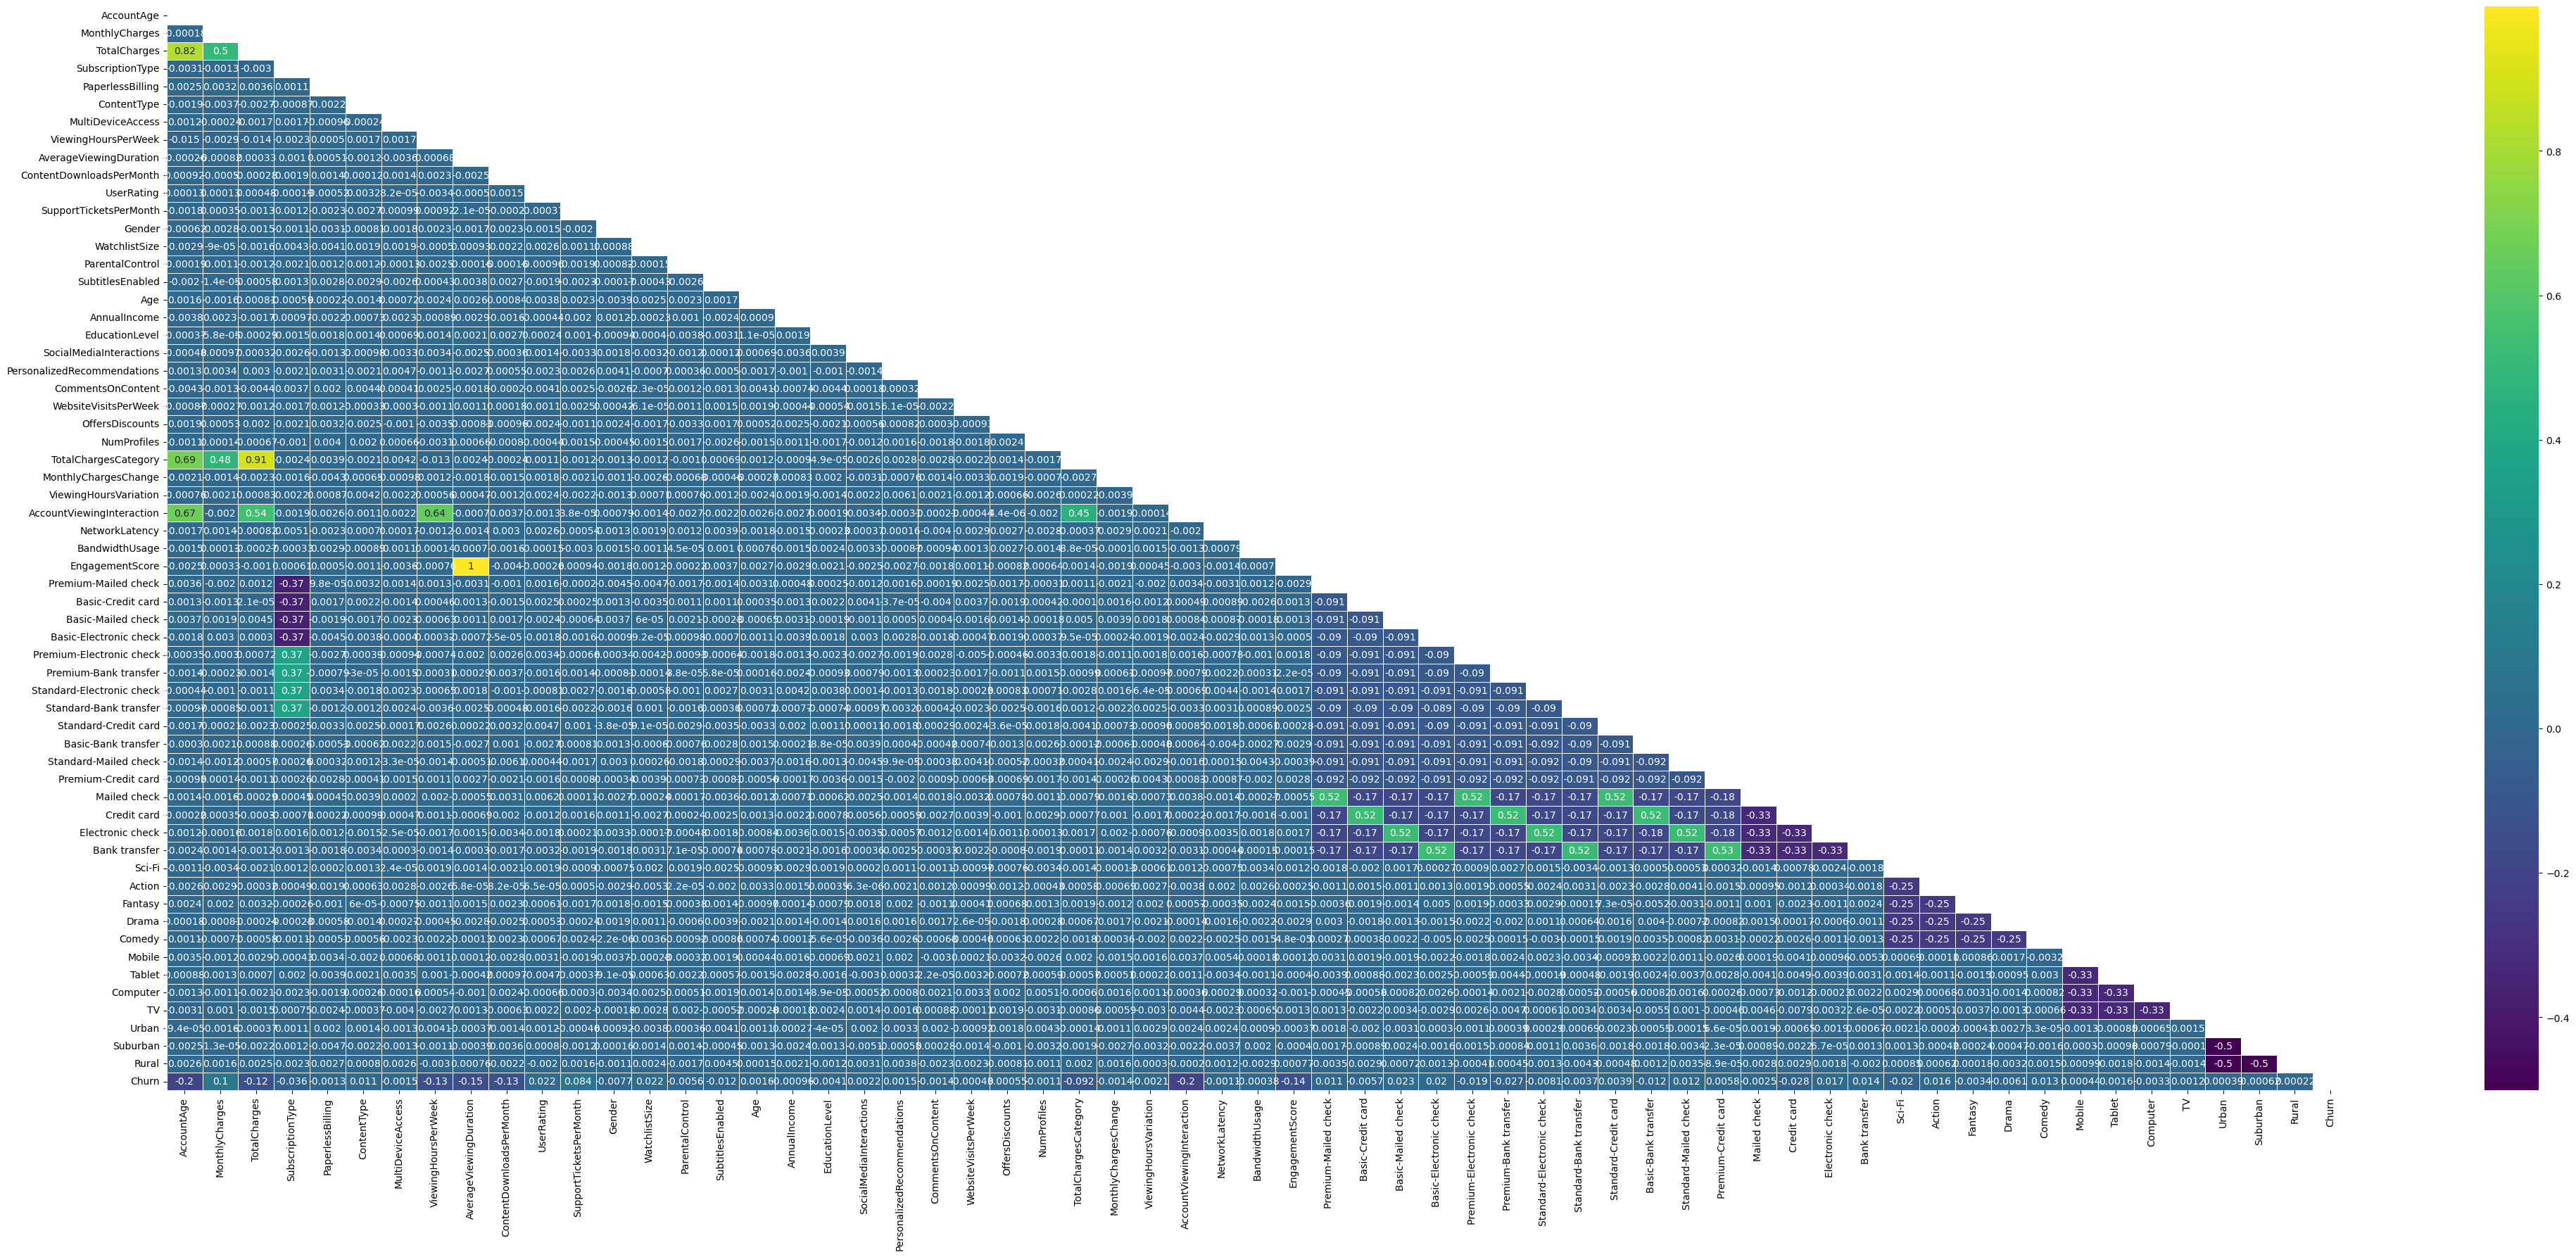

In [124]:

column_to_move = encodedData.pop(churnCol)

encodedData.insert(encodedData.columns.size, churnCol, column_to_move)
correlation_matrix = encodedData.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(50,20))
sns.heatmap(correlation_matrix, linewidths=.5, cmap='viridis', annot=True, mask=mask)

## Training model

### Preparing datasets

In [150]:
y = encodedData[churnCol].copy()
x = encodedData.copy().drop(churnCol, axis=1)

x.columns


Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'Age',
       'AnnualIncome', 'EducationLevel', 'SocialMediaInteractions',
       'PersonalizedRecommendations', 'CommentsOnContent',
       'WebsiteVisitsPerWeek', 'OffersDiscounts', 'NumProfiles',
       'TotalChargesCategory', 'MonthlyChargesChange', 'ViewingHoursVariation',
       'AccountViewingInteraction', 'NetworkLatency', 'BandwidthUsage',
       'EngagementScore', 'Premium-Mailed check', 'Basic-Credit card',
       'Basic-Mailed check', 'Basic-Electronic check',
       'Premium-Electronic check', 'Premium-Bank transfer',
       'Standard-Electronic check', 'Standard-Bank transfer',
       'Standard-Credit card', 'Basic-Bank transfer', 'Stan

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(192089, 60)
(48023, 60)
(192089,)
(48023,)


In [176]:
max_iterations = 1000

### Normal classification model

In [177]:
normalModelPipeline = Pipeline([
    ('classication', LogisticRegression(max_iter=max_iterations))
])

normalModelPipeline.fit(x_train, y_train)

y_pred_normal = normalModelPipeline.predict(x_test)

normalModelMetrics = utils.calculate_metrics(y_test, y_pred_normal)
utils.print_metrics(normalModelMetrics)



Accuracy: 0.8191283343397955
Precision: 0.5943152454780362
Recall: 0.026258705331658864
F1: 0.050295211021211456
vpn: 0.8209547401125199
Specificity: 0.9960014262428688


### Classification model with no lineal relations

In [180]:
noLinealFeaturesModel = Pipeline([
    ('polyFeatures', PolynomialFeatures(degree=3)),
    ('classifier', LogisticRegression(max_iter=100))
])

noLinealFeaturesModel.fit(x_train, y_train)



: 

In [ ]:
y_pred_noLineal = noLinealFeaturesModel.predict(x_test)
polynomialMetrics = utils.calculate_metrics(y_test, y_pred_noLineal)
utils.print_metrics(polynomialMetrics)

Accuracy: 0.8179830497886429
Precision: 0.5110294117647058
Recall: 0.04760817444913803
F1: 0.08710182767624021
vpn: 0.8232889190162476
Specificity: 0.9898380195599022
